In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, precision_recall_curve

In [4]:
os.getcwd()

'/Users/moizali/Documents/Personal/MusicClassificationModel/02_model_developement'

In [5]:
df = pd.read_csv("Dim_Tracks_All.csv")

In [6]:
og_df = df.copy()

In [7]:
df.tail()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Name,Artist,category
31675,7JCmaxxkWIcq8BRiSKHH9V,0.756,0.887,6,-4.131,0,0.1300,0.00104,0.0126,0.1180,0.2460,122.958,163126,4,2002 - KREAM Remix,Anne-Marie,Dance/Electronic
31676,7KU1k3MVP8eFj81U3L85i8,0.756,0.676,11,-13.684,0,0.0459,0.01110,0.9070,0.0987,0.0883,123.007,412258,4,Mars 500,Chloé (Thévenin),Dance/Electronic
31677,5KbciFSKG8E1mmABSstFWI,0.756,0.867,2,-3.477,1,0.0360,0.03140,0.8030,0.1050,0.0395,120.006,362000,4,Emotions,D-Malice,Dance/Electronic
31678,5PNvgiKSwMdjBsDsgFCFLX,0.881,0.661,11,-7.681,0,0.0343,0.09800,0.0187,0.1010,0.9650,124.023,181306,4,Slow Down (feat. Jorja Smith) - Vintage Cultur...,Maverick Sabre,Dance/Electronic
31679,4yq5KyYQT6daB88w7BbFDR,0.881,0.948,3,-9.380,0,0.0730,0.00318,0.4810,0.0791,0.9640,124.990,524625,4,Ketchup - Original Mix,Dj On,Dance/Electronic


In [8]:
df.shape

(31680, 17)

In [9]:
df['category'].unique()

array(['Pop', 'R&B', 'Jazz', 'Rock', 'Soul', 'Indie', 'Sleep', 'Country',
       'Hip-Hop', 'Dance/Electronic'], dtype=object)

In [10]:
df["category"].value_counts()

Jazz                4871
Dance/Electronic    4559
Indie               3721
Sleep               2901
Soul                2860
Hip-Hop             2809
Rock                2791
Pop                 2663
R&B                 2285
Country             2220
Name: category, dtype: int64

## Data Cleaning

In [11]:
df.columns

Index(['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'Name', 'Artist',
       'category'],
      dtype='object')

In [12]:
# Drop columns that are not required for modelling
df.drop(["track_id","Name","Artist"], axis=1, inplace=True)

In [13]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'category'],
      dtype='object')

In [14]:
# Checking for NAs
df.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
category            0
dtype: int64

In [15]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,category
0,0.375,0.556,11,-7.196,1,0.0410,0.40000,0.000000,0.0956,0.397,111.827,271160,4,Pop
1,0.375,0.392,4,-10.063,0,0.0293,0.76400,0.000036,0.0884,0.172,129.854,212009,3,Pop
2,0.500,0.794,3,-7.579,1,0.0290,0.00478,0.005820,0.0926,0.257,90.007,263801,4,Pop
3,0.500,0.375,0,-13.723,1,0.0620,0.58800,0.014700,0.1150,0.170,129.388,192000,4,Pop
4,0.500,0.156,1,-11.472,1,0.0469,0.87000,0.000000,0.1250,0.405,173.794,163227,4,Pop


## EDA

In [16]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,3.168000e+04,31680.000000
mean,0.578924,0.585796,5.243119,-9.938733,0.612942,0.084649,0.328094,0.253872,0.183837,0.457998,118.323130,2.279296e+05,3.898043
std,0.183607,0.258706,3.574117,6.593503,0.487085,0.087845,0.338429,0.370386,0.157481,0.256960,29.123123,8.786504e+04,0.443274
min,0.000000,0.000020,0.000000,-48.770000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,3.260900e+04,0.000000
25%,0.468000,0.423000,2.000000,-11.447000,0.000000,0.036500,0.027800,0.000002,0.096200,0.247000,95.860750,1.739975e+05,4.000000
50%,0.602000,0.622000,5.000000,-8.066000,1.000000,0.049100,0.185000,0.001700,0.119000,0.454500,119.123500,2.104390e+05,4.000000
75%,0.713000,0.794000,8.000000,-5.825000,1.000000,0.086400,0.604000,0.627000,0.215000,0.661000,135.835000,2.604270e+05,4.000000
max,0.983000,1.000000,11.000000,1.836000,1.000000,0.944000,0.996000,1.000000,0.992000,0.985000,219.446000,2.594860e+06,5.000000


In [17]:
og_df[og_df['speechiness'] > 0.86400]

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Name,Artist,category
24457,3qevs4lH9Nw208oRrz3Qhy,0.708,0.465,0,-14.789,1,0.916,0.4010,0.0,0.0965,0.581,74.199,113395,1,Sane to me,High John,Hip-Hop
25280,5WCqx3pgABaG7EQgAXStSN,0.873,0.159,1,-15.051,1,0.930,0.8740,0.0,0.2530,0.793,157.017,103993,4,BAGGY,TisaKorean,Hip-Hop
25993,0s3Pm81BtAOV1ZXJv6ymBD,0.818,0.452,4,-10.988,0,0.881,0.5980,0.0,0.1370,0.694,126.651,161684,5,Bando Baby Diaries,D-Block Europe,Hip-Hop
26202,3gKwVWwKmeuFtPubICbOGc,0.883,0.553,6,-13.232,0,0.944,0.0161,0.0,0.2280,0.578,91.753,220840,4,Paul Revere,Beastie Boys,Hip-Hop


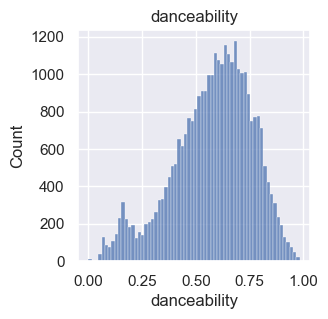

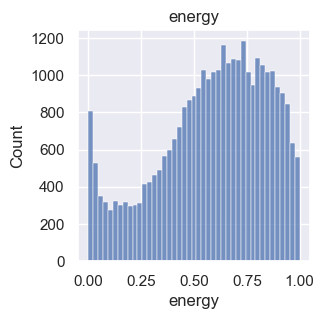

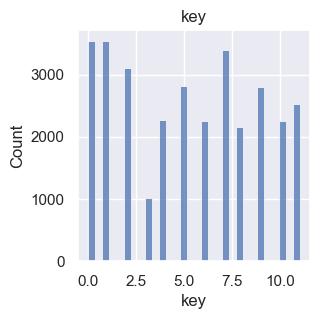

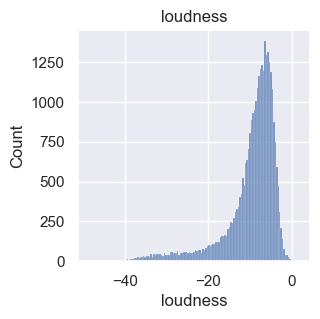

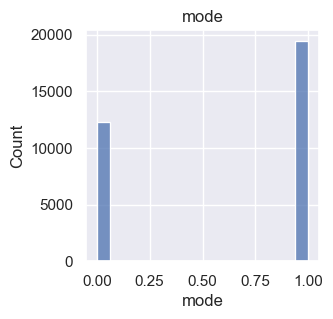

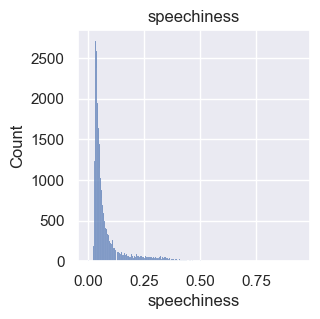

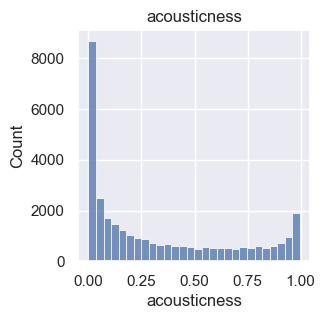

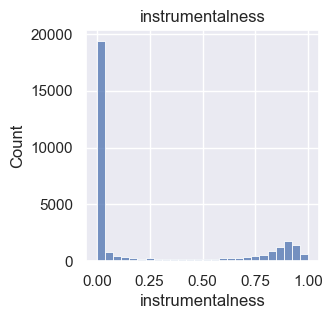

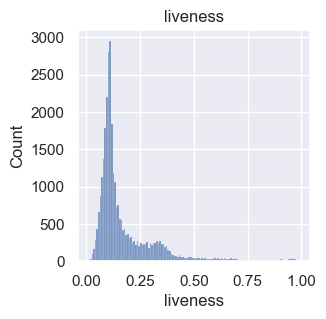

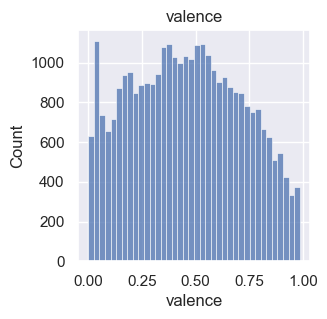

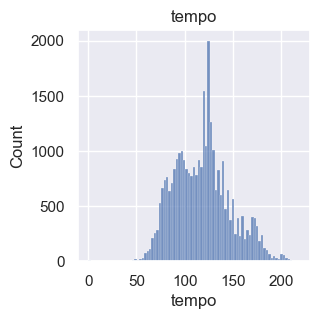

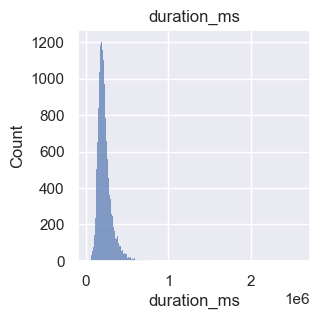

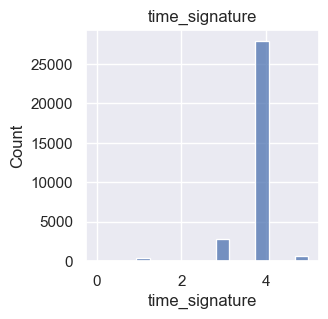

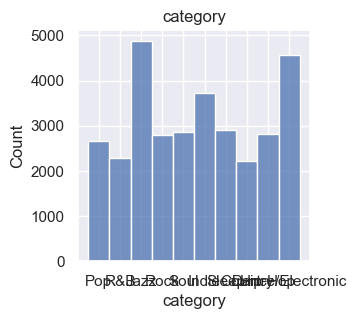

In [18]:
sns.set(rc={'figure.figsize':(3,3)})
for i in df.columns:
    plt.figure(i)
    ax = sns.histplot(df[i])
    ax.set_title(i)
    plt.show()

<AxesSubplot: >

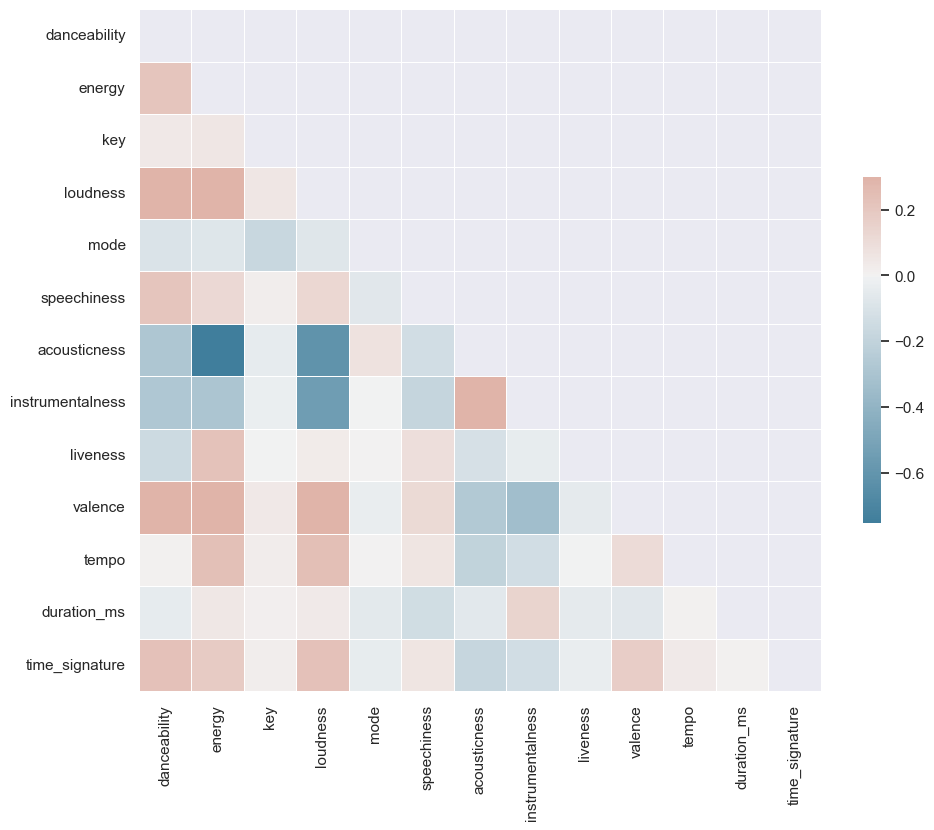

In [19]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### EDA by category

<AxesSubplot: xlabel='danceability', ylabel='Count'>

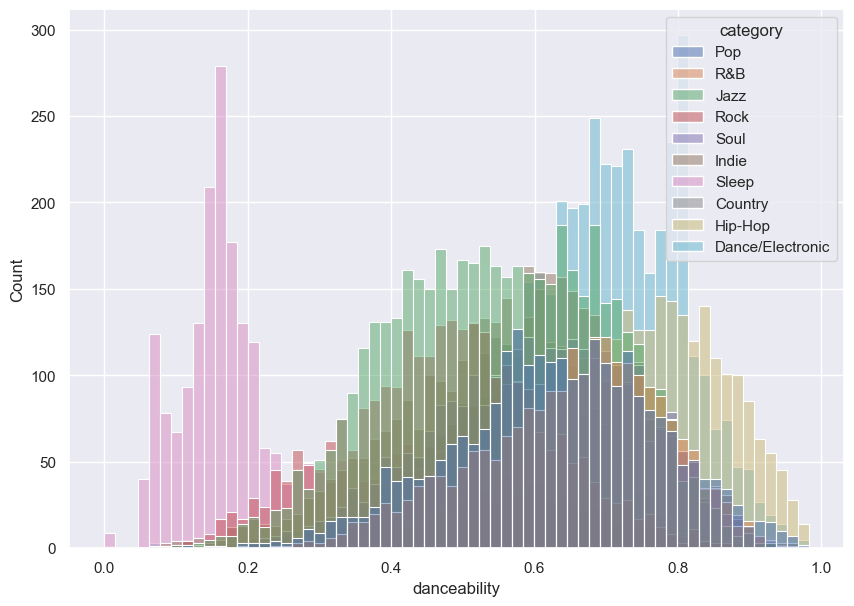

In [20]:
# Danceability by category
sns.set(rc={'figure.figsize':(10,7)})
sns.histplot(data=df, x="danceability", hue="category")

<AxesSubplot: xlabel='energy', ylabel='Count'>

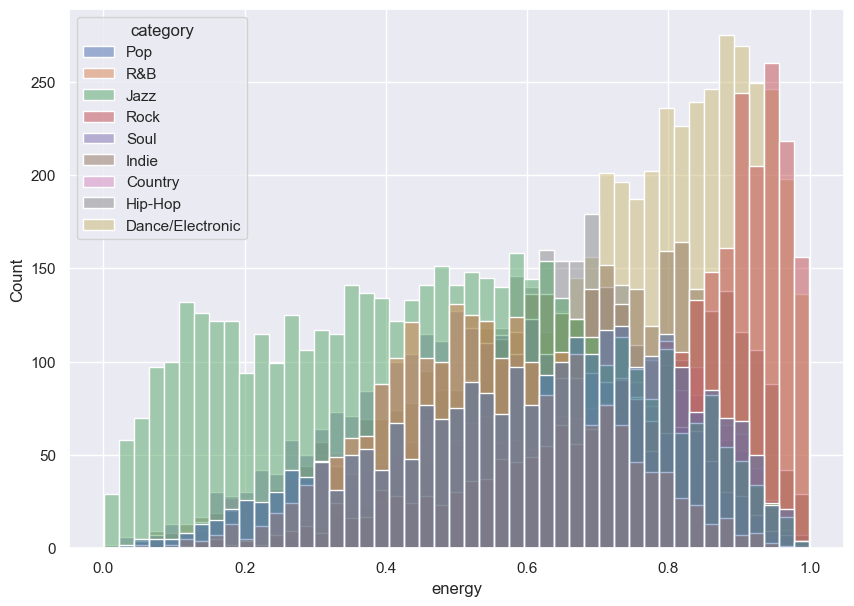

In [21]:
# Energy by category
sns.set(rc={'figure.figsize':(10,7)})
temp_df = df[df['category'] != 'Sleep']
sns.histplot(data=temp_df, x="energy", hue="category")

<AxesSubplot: xlabel='loudness', ylabel='Count'>

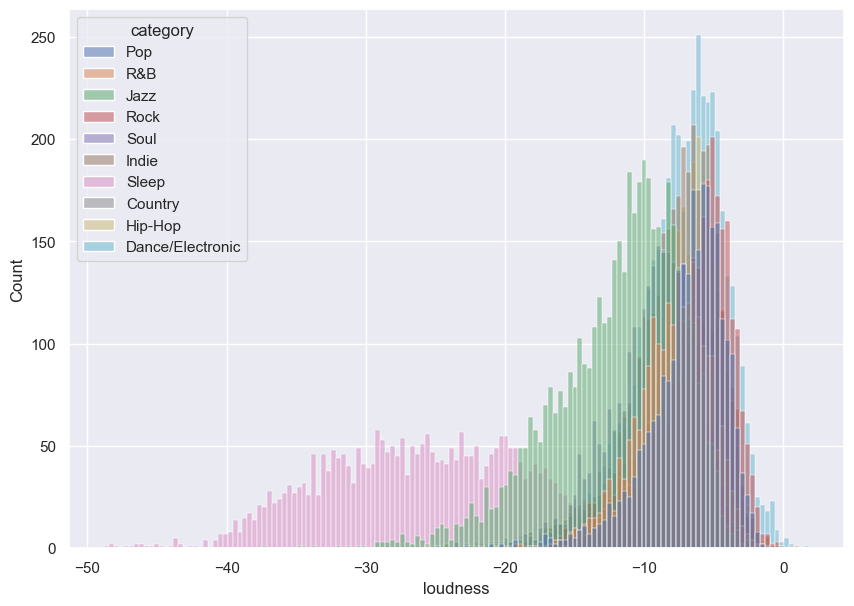

In [22]:
# Loudness by category
sns.set(rc={'figure.figsize':(10,7)})
# temp_df = df[df['category'] != 'Sleep']
sns.histplot(data=df, x="loudness", hue="category")

<AxesSubplot: xlabel='speechiness', ylabel='Count'>

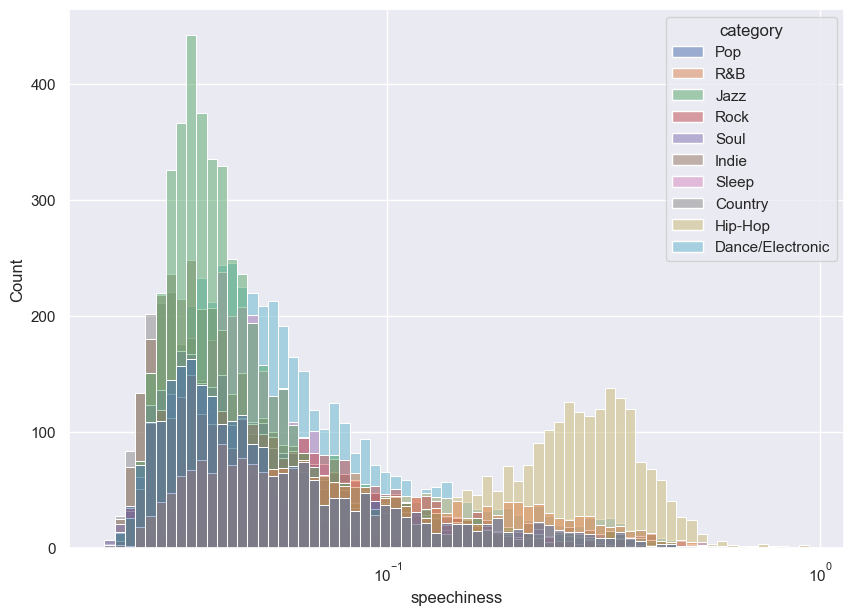

In [23]:
# Loudness by category
sns.set(rc={'figure.figsize':(10,7)})
temp_df = df[df['speechiness'] > 0]
sns.histplot(data=temp_df, x="speechiness", hue="category", log_scale=True)

Percentage of non zeros in df: 49.56% 


<AxesSubplot: xlabel='acousticness', ylabel='Count'>

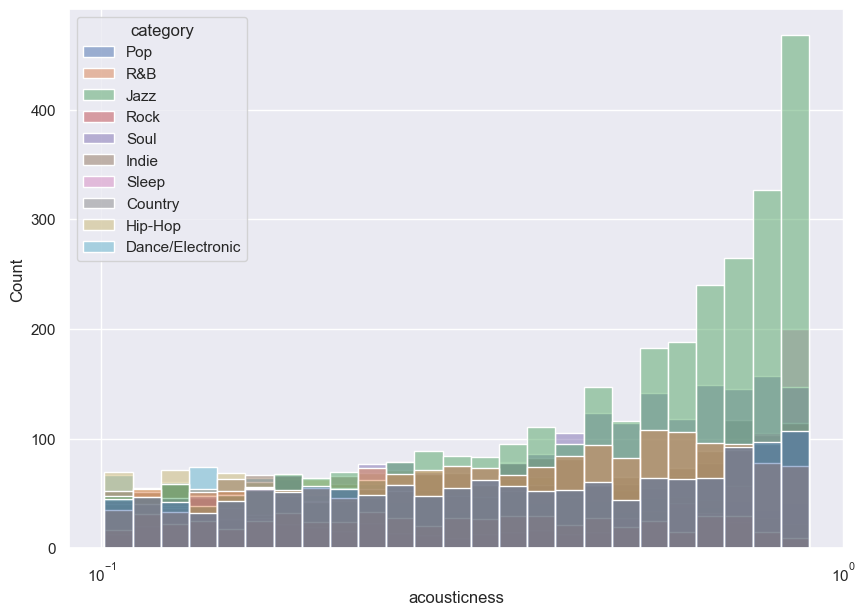

In [24]:
# Acousticness by category
sns.set(rc={'figure.figsize':(10,7)})
temp_df = df[(df['acousticness'] > 0.1) & (df['acousticness'] < 0.9)]
print(f"Percentage of non zeros in df: {temp_df.shape[0] / df.shape[0]:.2%} ")
sns.histplot(data=temp_df, x="acousticness", hue="category", log_scale=True)

Percentage of non zeros in df: 41.45% 


<AxesSubplot: xlabel='instrumentalness', ylabel='Count'>

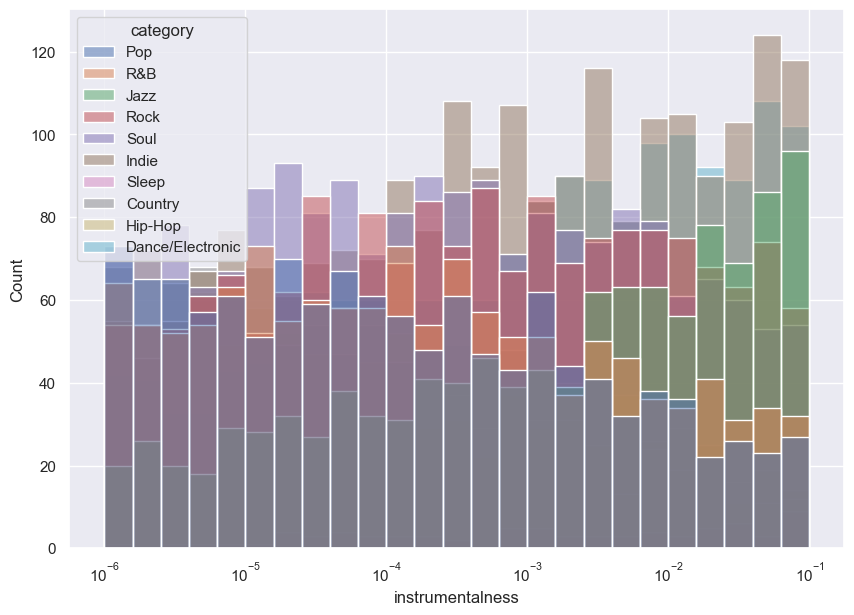

In [25]:
# Instrumentalness by category
sns.set(rc={'figure.figsize':(10,7)})
temp_df = df[(df['instrumentalness'] > 0) & (df['instrumentalness'] < 0.1)]
print(f"Percentage of non zeros in df: {temp_df.shape[0] / df.shape[0]:.2%} ")
sns.histplot(data=temp_df, x="instrumentalness", hue="category", log_scale=True)

<AxesSubplot: xlabel='valence', ylabel='Count'>

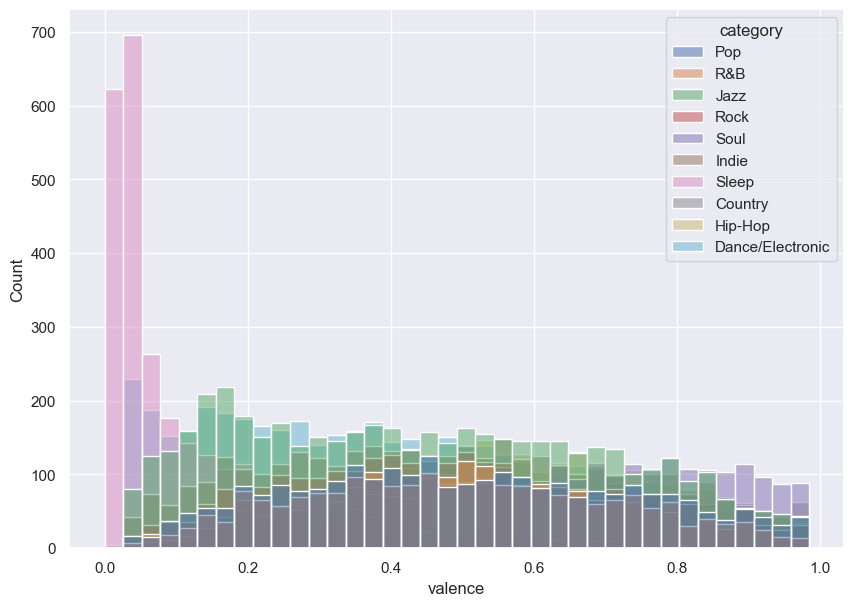

In [26]:
# Valence by category
sns.set(rc={'figure.figsize':(10,7)})
sns.histplot(data=df, x="valence", hue="category")

<AxesSubplot: xlabel='tempo', ylabel='Count'>

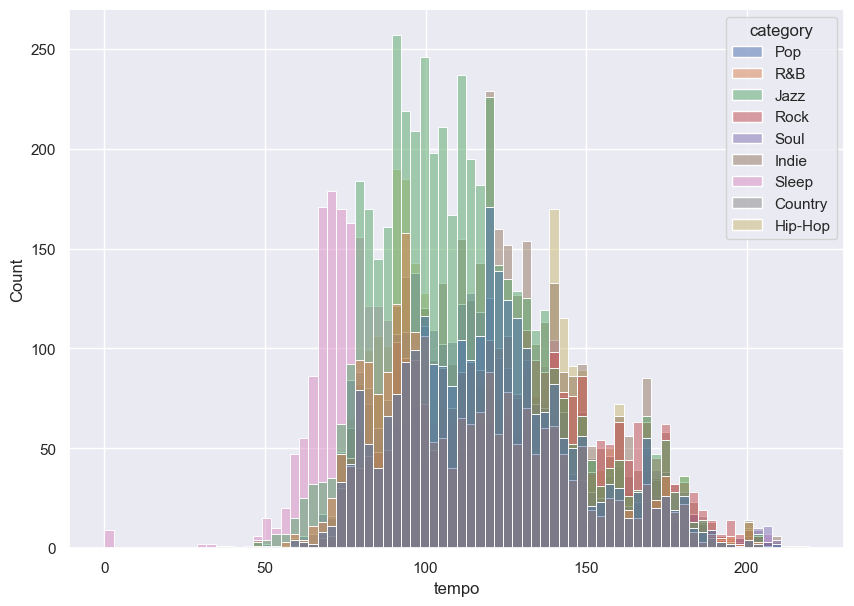

In [27]:
# Tempo by category
sns.set(rc={'figure.figsize':(10,7)})
temp_df = df[(df['category'] != 'Dance/Electronic')]
sns.histplot(data=temp_df, x="tempo", hue="category")

## Data Pre Processing

In [28]:
Target_Mapping = {'Hip-Hop':0, 'Pop':1, 'Country':2, 'Rock':3, 'R&B':4, 'Dance/Electronic':5,
       'Indie':6, 'Sleep':7, 'Jazz':8, 'Soul':9}
# Creating Target variable
df["Target"] = df["category"].map(Target_Mapping)

In [29]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'category', 'Target'],
      dtype='object')

In [30]:
Y = df["Target"]
X = df.drop(["category","Target"], axis=1)

In [31]:
X_train, X_test, y_train, y_test  = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

## Data Modelling

### Decision Tree

In [32]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.4322916666666667

### Random Forest

In [34]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [35]:
print('Metrics for test data set: ')
accuracy_score(y_test, y_pred)

Metrics for test data set: 


0.5618686868686869

##### Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8],
    'n_estimators': [100, 200]
}
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

print('Metrics for test data set: ')
accuracy_score(y_test, y_pred)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   2.4s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   2.4s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   2.5s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   2.5s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   2.6s
[CV] END max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   2.2s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   4.9s
[CV] END max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   

0.5634469696969697

[Text(0, 0.5, 'Hip-Hop'),
 Text(0, 1.5, 'Pop'),
 Text(0, 2.5, 'Country'),
 Text(0, 3.5, 'Rock'),
 Text(0, 4.5, 'R&B'),
 Text(0, 5.5, 'Dance/Electronic'),
 Text(0, 6.5, 'Indie'),
 Text(0, 7.5, 'Sleep'),
 Text(0, 8.5, 'Jazz'),
 Text(0, 9.5, 'Soul')]

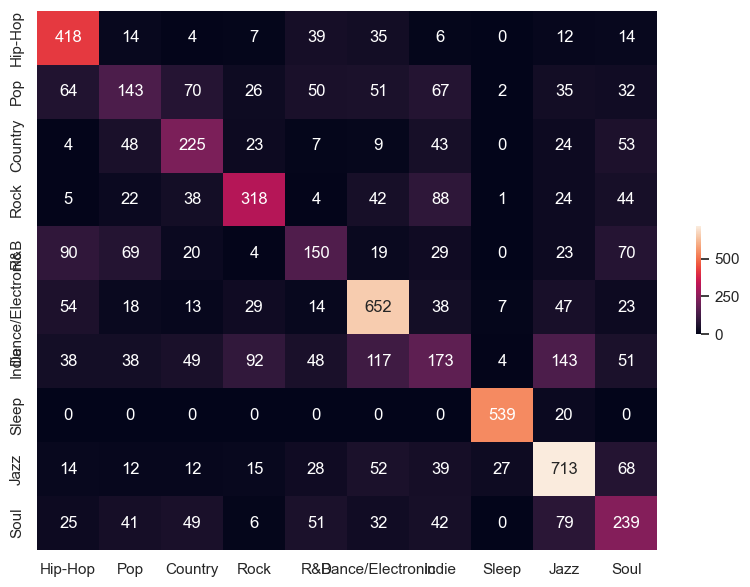

In [37]:
# Feature importance
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cbar_kws={"shrink": .2}, fmt='g')
ax.xaxis.set_ticklabels(Target_Mapping.keys())
ax.yaxis.set_ticklabels(Target_Mapping.keys())

In [38]:
for i in range(len(list(Target_Mapping.keys()))):
    category = list(Target_Mapping.keys())[i]
    precision = precision_score(y_test, y_pred, average='macro', labels=[i])
    recall = recall_score(y_test, y_pred, average='macro', labels=[i])
    print(f"Category: {category}, Precision: {precision:.0%}, Recall: {recall:.0%}")

Category: Hip-Hop, Precision: 59%, Recall: 76%
Category: Pop, Precision: 35%, Recall: 26%
Category: Country, Precision: 47%, Recall: 52%
Category: Rock, Precision: 61%, Recall: 54%
Category: R&B, Precision: 38%, Recall: 32%
Category: Dance/Electronic, Precision: 65%, Recall: 73%
Category: Indie, Precision: 33%, Recall: 23%
Category: Sleep, Precision: 93%, Recall: 96%
Category: Jazz, Precision: 64%, Recall: 73%
Category: Soul, Precision: 40%, Recall: 42%


### XGBoost

In [39]:
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [40]:
y_pred = xgbmodel.predict(X_test)
accuracy_score(y_test, y_pred)

0.5547664141414141

#### HyperParameter Tuning

In [41]:
params_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [42]:
folds = 3
param_comb = 5

grid_search = GridSearchCV(estimator = xgbmodel, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[18:14:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[18:14:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[18:14:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[18:14:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[18:14:43] WARNING: /Users/runner/w

In [43]:
print(accuracy_score(y_test, y_pred))

0.5557133838383839


[Text(0, 0.5, 'Hip-Hop'),
 Text(0, 1.5, 'Pop'),
 Text(0, 2.5, 'Country'),
 Text(0, 3.5, 'Rock'),
 Text(0, 4.5, 'R&B'),
 Text(0, 5.5, 'Dance/Electronic'),
 Text(0, 6.5, 'Indie'),
 Text(0, 7.5, 'Sleep'),
 Text(0, 8.5, 'Jazz'),
 Text(0, 9.5, 'Soul')]

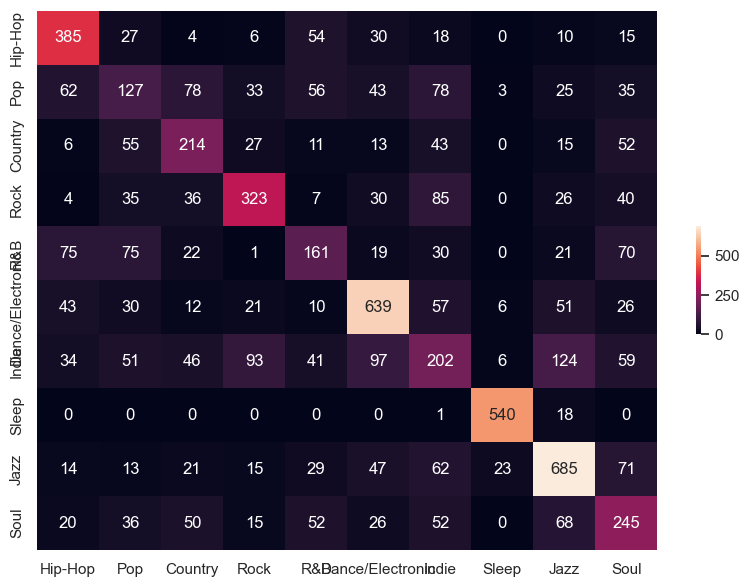

In [44]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cbar_kws={"shrink": .2}, fmt='g')
ax.xaxis.set_ticklabels(Target_Mapping.keys())
ax.yaxis.set_ticklabels(Target_Mapping.keys())

In [45]:
for i in range(len(list(Target_Mapping.keys()))):
    category = list(Target_Mapping.keys())[i]
    precision = precision_score(y_test, y_pred, average='macro', labels=[i])
    recall = recall_score(y_test, y_pred, average='macro', labels=[i])
    print(f"Category: {category}, Precision: {precision:.0%}, Recall: {recall:.0%}")

Category: Hip-Hop, Precision: 60%, Recall: 70%
Category: Pop, Precision: 28%, Recall: 24%
Category: Country, Precision: 44%, Recall: 49%
Category: Rock, Precision: 60%, Recall: 55%
Category: R&B, Precision: 38%, Recall: 34%
Category: Dance/Electronic, Precision: 68%, Recall: 71%
Category: Indie, Precision: 32%, Recall: 27%
Category: Sleep, Precision: 93%, Recall: 97%
Category: Jazz, Precision: 66%, Recall: 70%
Category: Soul, Precision: 40%, Recall: 43%


## Saving Model

In [47]:
from sklearn.feature_extraction import DictVectorizer
import pickle
dv =  DictVectorizer(sparse=False)
train_dicts = X_train.reset_index(drop=True).to_dict(orient='records')

output_file = f'model_v1'
with open(output_file, 'wb') as f_out:
    pickle.dump((dv,best_clf), f_out)

In [50]:
features_new = {'danceability': 0.145, 'energy': 0.966, 'key': 6, 'loudness': -26.453, 'mode': 1, 'speechiness': 0.0521, 'acousticness': 0.116, 'instrumentalness': 0.824, 'liveness': 0.789, 'valence': 0.00635, 'tempo': 78.2, 'duration_ms': 152000, 'time_signature': 3}

Target_Mapping = {'Hip-Hop':0, 'Pop':1, 'Country':2, 'Rock':3, 'R&B':4, 'Dance/Electronic':5,
       'Indie':6, 'Sleep':7, 'Jazz':8, 'Soul':9}

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.145,0.966,6,-26.453,1,0.0521,0.116,0.824,0.789,0.00635,78.2,152000,3


In [59]:
X = dv.fit_transform([features_new])
print(X)
best_clf.predict_proba(pd.json_normalize(features_new))

[[ 1.1600e-01  1.4500e-01  1.5200e+05  9.6600e-01  8.2400e-01  6.0000e+00
   7.8900e-01 -2.6453e+01  1.0000e+00  5.2100e-02  7.8200e+01  3.0000e+00
   6.3500e-03]]


array([[1.0414781e-06, 5.5286534e-07, 3.4431929e-07, 5.9575618e-06,
        3.8747874e-07, 5.6201188e-06, 1.6703783e-06, 9.9997926e-01,
        4.2556762e-06, 9.5348628e-07]], dtype=float32)